In [2]:
%matplotlib inline


PyTorch: Tensors
---------------------

上一小节设计了一个完全连接的ReLU网络，具有一个隐藏层，没有偏差，使用平方损失函数，训练由x预测y；

整个实现使用numpy手动计算正向传递、损失和反向传递；

numpy数组是一个通用的n维数组，并没有专门针对深度学习、梯度或计算图设计，只是一种执行通用数值计算的方法；

PyTorch Tensor和numpy数组的最大区别在于PyTorch Tensor可以在CPU或GPU上运行。 要在GPU上运行操作，只需将Tensor转换为cuda数据类型即可。



In [1]:
import torch
import matplotlib.pyplot as plt


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") #  在 GPU中跑使用此行


# N是批量大小，D_in是输入维度;
# H是隐藏层维度，D_out是输出维度。
N, D_in, H, D_out = 64, 1000, 100, 10

# 创建随机输入和输出数据
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# 随机初始化权重
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6
#创建图并命名
plt.figure('Loss')


iter_plot = []
loss_plot = []
for t in range(500):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    iter_plot.append(t)
    loss_plot.append(loss)
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 33597736.0
1 27880288.0
2 25237410.0
3 21965320.0
4 17336102.0
5 12199085.0
6 7896167.0
7 4909096.0
8 3088842.25
9 2034842.25
10 1428845.25
11 1066935.5
12 837883.125
13 682509.0625
14 570268.5625
15 484642.15625
16 416700.53125
17 361278.03125
18 315221.28125
19 276427.625
20 243431.21875
21 215174.296875
22 190853.21875
23 169794.546875
24 151458.625
25 135459.859375
26 121430.984375
27 109090.375
28 98201.1953125
29 88565.46875
30 80018.703125
31 72418.78125
32 65652.171875
33 59608.60546875
34 54195.23828125
35 49342.859375
36 44981.875
37 41056.1953125
38 37515.4375
39 34319.90234375
40 31429.716796875
41 28810.93359375
42 26435.50390625
43 24277.78125
44 22314.783203125
45 20527.498046875
46 18899.9140625
47 17416.41015625
48 16060.4404296875
49 14819.9638671875
50 13684.4404296875
51 12644.943359375
52 11693.052734375
53 10827.0791015625
54 10035.08203125
55 9306.8369140625
56 8637.314453125
57 8020.5908203125
58 7451.70751953125
59 6927.1943359375
60 6442.76904296875
61 5995.

373 0.0005965165328234434
374 0.0005782382213510573
375 0.0005605414626188576
376 0.0005406530108302832
377 0.0005240346654318273
378 0.0005064657889306545
379 0.0004901781212538481
380 0.0004747858620248735
381 0.00046063840272836387
382 0.0004462926008272916
383 0.0004327252390794456
384 0.0004187973972875625
385 0.00040599892963655293
386 0.00039442110573872924
387 0.0003830337373074144
388 0.0003711159515660256
389 0.00035982142435386777
390 0.00035004952223971486
391 0.00034003995824605227
392 0.0003303309204056859
393 0.00032123218988999724
394 0.00031149855931289494
395 0.0003037908172700554
396 0.00029434103635139763
397 0.0002869298041332513
398 0.00027917756233364344
399 0.0002709890832193196
400 0.0002632485411595553
401 0.00025576920597814023
402 0.00024915728135965765
403 0.00024325030972249806
404 0.00023670178779866546
405 0.0002304037770954892
406 0.00022428440570365638
407 0.00021923343592789024
408 0.0002136348921339959
409 0.00020869830041192472
410 0.000203389470698

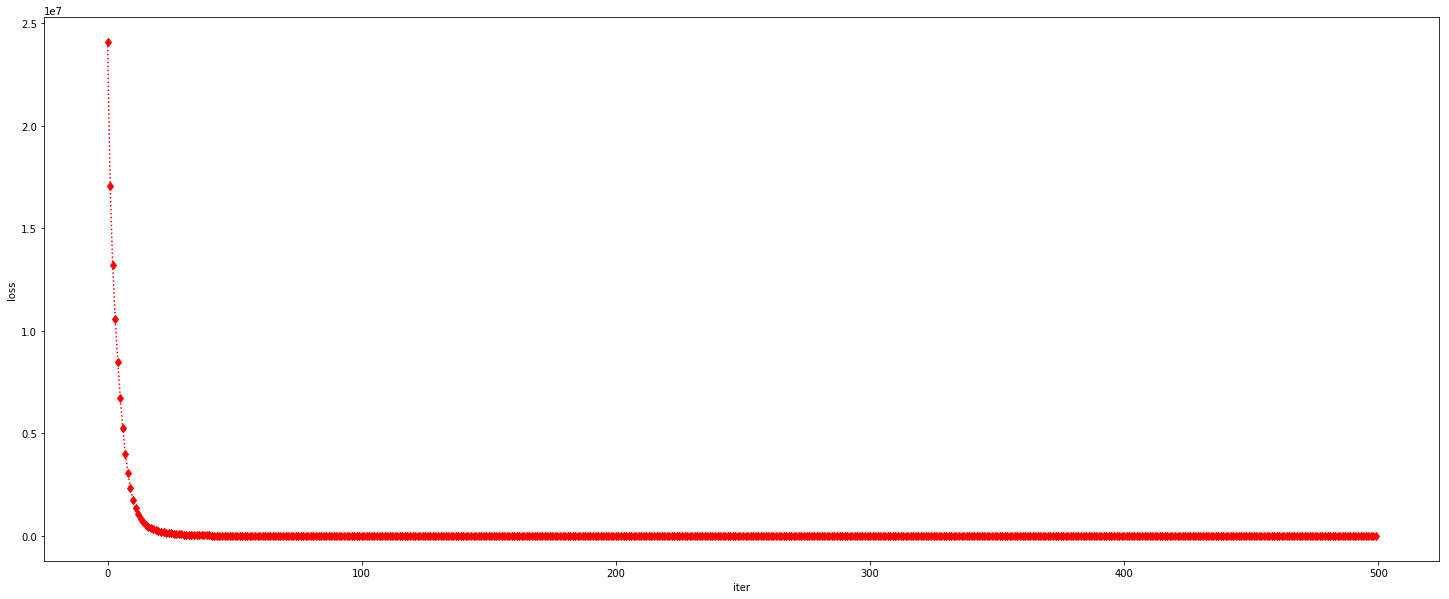

In [4]:
plt.figure(figsize=(25,10))
ax = plt.subplot()
#设置x轴、y轴名称
ax.set_xlabel('iter')
ax.set_ylabel('loss')
plt.plot(iter_plot,loss_plot,marker='d',linestyle=':',color='r')
plt.show()